There are n cities connected by m flights. Each flight starts from city u and arrives at v with a price w.

Now given all the cities and flights, together with starting city src and the destination dst, your task is to find the cheapest price from src to dst with up to k stops. If there is no such route, output -1.

Example 1:
Input: 
n = 3, edges = [[0,1,100],[1,2,100],[0,2,500]]
src = 0, dst = 2, k = 1
Output: 200
Explanation: 
The graph looks like this:

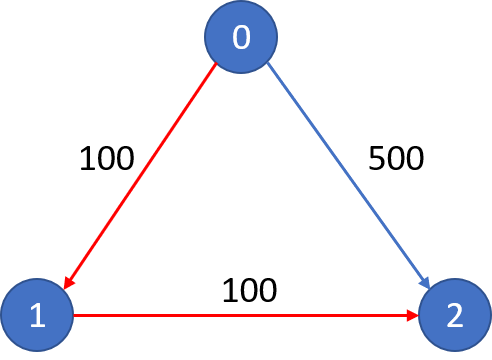    

The cheapest price from city 0 to city 2 with at most 1 stop costs 200, as marked red in the picture.
Example 2:
Input: 
n = 3, edges = [[0,1,100],[1,2,100],[0,2,500]]
src = 0, dst = 2, k = 0
Output: 500
Explanation: 
The graph looks like this:

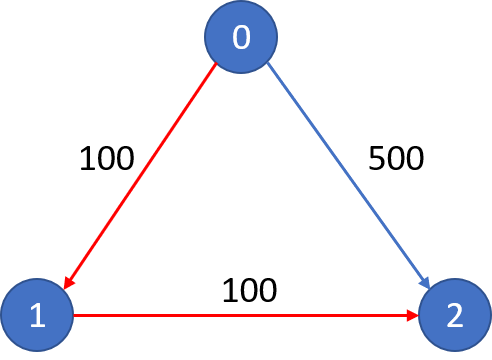

The cheapest price from city 0 to city 2 with at most 0 stop costs 500, as marked blue in the picture.
 

Constraints:

The number of nodes n will be in range [1, 100], with nodes labeled from 0 to n - 1.
The size of flights will be in range [0, n * (n - 1) / 2].
The format of each flight will be (src, dst, price).
The price of each flight will be in the range [1, 10000].
k is in the range of [0, n - 1].
There will not be any duplicated flights or self cycles.

In [6]:
class Solution:
    def findCheapestPrice(self, n, flights, src, dst, K):
        from collections import defaultdict
        import heapq
        
        graph = defaultdict(list)
        for u, v, w in flights:
            graph[u].append((v,w))
            
        Q = [(0, src, K)] # price, start(node), stops
        while Q:
            price, node, k = heapq.heappop(Q)
            if node == dst:
                return price
            if k >= 0:
                for v, w in graph[node]:
                    alt = price + w
                    heapq.heappush(Q, (alt, v, k-1))
        return -1
s = Solution()
s.findCheapestPrice(3, [[0,1,100],[1,2,100],[0,2,500]], 0, 2, 1)

200

In [ ]:
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
        import collections
        graph = collections.defaultdict(list)
        # 그래프 인접 리스트 구성
        for u, v, w in flights:
            graph[u].append((v,w))
            
        # 큐 변수: [(가격, 정점, 남은 가능 경유지 수)]
        Q = [(0, src, K)]
        
        import heapq
        # 우선 순위 큐 최솟값 기준으로 도착점까지 최소 비용 판별
        while Q:
            price, node, k = heapq.heappop(Q)
            if node == dst:
                return price
            if k >= 0:
                for v, w in graph[node]:
                    alt = price + w
                    heapq.heappush(Q, (alt, v, k-1))
        return -1